## Intergration using `scipy.integrate` package

#### Single Integration:
- Let us demonstrate the one-dimensional integration through an example by numerically evaluating $\int\limits_0^4 e^{-x^2}\,dx$
- For this we use `scipy.integrate.quad` function which takes three parameters integrand_func, lower_limit, upper_limit and returns the integral value and error.

In [1]:
import numpy as np
from scipy.integrate import quad

fx = lambda x: np.exp(-x**2)

val, err = quad(fx,0,4)
print('Integration value is: ',val)
print('Error in integration is: ',err)

Integration value is:  0.8862269117895689
Error in integration is:  1.318014947623546e-08


#### Double Integration:
- Let us evaluate the doube integration $\int\limits_{x=x_0}^{x_1}\int\limits_{y=f_1(x)}^{f_2(x)}\,g(x,y)\,dy\,dx$
- For this we use `scipy.integrate.dblquad` function which takes five parameters integrand_func, lower_x_limit, upper_x_limit, lower_y_limit, upper_y_limit and returns the integral value and error.
- **Note that the ordering of the arguments in the definition of $g$ should correspond to the ordering of integrations in the case of variable integration limits. The first (last) argument of $g$ is the last (first) to be integrated. If the limits are constants then, the ordering is irrelevant.**
- For our understanding let us evaluate the following two integrals 
$\int\limits_{x=0}^{2}\int\limits_{y=0}^{5} x^2 + y \,dy\,dx$ and $\int\limits_{x=0}^{2}\int\limits_{y=0}^{x} x^2 + y \,dy\,dx$

In [2]:
import numpy as np
from scipy.integrate import dblquad

# integration of x^2+y between $x \in (0,2)$ and $y \in (0,5)$
fxy = lambda y,x: x**2 + y

val, err = dblquad(fxy,0,2,0,5)
print('Integration value is: ',val)

# integration of x^2+y between $x \in (0,2)$ and $y \in (0,x)$
fxy = lambda y,x: x**2 + y
ly = lambda x: 0
uy = lambda x: x

val, err = dblquad(fxy,0,2,ly,uy)
print('Integration value is: ',val)

Integration value is:  38.33333333333333
Integration value is:  5.333333333333333


#### Triple Integration:
- Let us evaluate the doube integration $\int\limits_{x=x_0}^{x_1}\int\limits_{y=f_1(x)}^{f_2(x)}\int\limits_{z=g_1(x,y)}^{g_2(x,y)}\,h(x,y,z)\,dz\,dy\,dx$
- For this we use `scipy.integrate.tplquad` function which takes seven parameters integrand_func, lower_x_limit, upper_x_limit, lower_y_limit, upper_y_limit, lower_z_limit, upper_z_limit and returns the integral value and error.
- **Note that the ordering of the arguments in the definition of $h$ should correspond to the ordering of integrations in the case of variable integration limits. The first (last) argument of $h$ is the last (first) to be integrated. If the limits are constants then, the ordering is irrelevant.**
- For our understanding let us evaluate the following two integrals 
$\int\limits_{x=0}^{2}\int\limits_{y=0}^{5}\int\limits_{z=-2}^{2} x^2 + y + z^3 \,dz\,dy\,dx$ and $\int\limits_{x=0}^{2}\int\limits_{y=0}^{x}\int\limits_{z=x+y}^{xy} x^2 + y + z^3 \,dz\,dy\,dx$

In [3]:
import numpy as np
from scipy.integrate import tplquad

fxyz = lambda z,y,x: x**2 + y + z**3
ly = lambda x: 0
uy = lambda x: 5
lz = lambda x,y: -2
uz = lambda x,y: 2

val, err = tplquad(fxyz,0,2,ly,uy,lz,uz)
print('Integration value is: ',val)

fxyz = lambda z,y,x: x**2 + y + z**3
ly = lambda x: 0
uy = lambda x: x
lz = lambda x,y: x+y
uz = lambda x,y: x*y

val, err = tplquad(fxyz,0,2,ly,uy,lz,uz)
print('Integration value is: ',val)

Integration value is:  153.33333333333331
Integration value is:  -16.88


#### Example for chage of order of integration

Consider the evaulating the integration
$$\int\limits_{x = 0}^{0.5}\int\limits_{z = -x}^x \int\limits_{y = z}^{1-2x+z} \, xy^2 + z \, dy\,dz\,dx$$

In [4]:
from scipy.integrate import tplquad

#function defintion. As the limits are in the order x,z,y
#in the lambda function we use the arguments in the order y,z,x
h = lambda y,z,x : x*y**2 + z

#lambda function for y-limits (which are functions of x and z)
ly = lambda x,z : z
uy = lambda x,z : 1-2*x+z

#lambda function for z-limits (which are functions of x)
lz = lambda x: -x
uz = lambda x: x

#Evaluating the integration
area, err = tplquad(h, 0,0.5, lz, uz, ly, uy)
print('The Integration value is: ',area)

The Integration value is:  0.0020833333333333337


#### Integration of tabular data

- When we need to integrate a tabular data, we can use `scipy.integrate.trapezoid` for Trapezoidal rule integration or `scipy.integrate.simpson` for Simpon's rule of integration.

###### Below we will demonstrate the use of the above two integration functions. For the let us consider evaluating the $\displaystyle \int_0^2 \frac{\sin(x)}{1+\cos(x)} \,dx$ by taking $n = 10$.

To evaluate the above integral first we need to generate the $10$ data points between $x = 0$ to $x=2$ and then evaluate the function value at these points and tabulate them as below:

| $x$    | $0$  | $0.22222222$ | $0.44444444$ | $0.66666667$ | $0.88888889$ | 
| ------ | ---- | ------------ | ------------ | ------------ | ------------ | 
| $f(x)$ | $0$ | $0.11157063$ | $0.22595393$ | $0.34625355$ | $0.47622143$ |

| $x$    |$1.11111111$ | $1.33333333$ | $1.55555556$ | $1.77777778$ | $2.0$ |
| ------ | ------------ | ------------ | ------------ | ------------ | ----- |
| $f(x)$ | $0.6207753$ | $0.78684289$ | $0.9848742$ | $1.23179859$ | $1.55740772$ |


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson

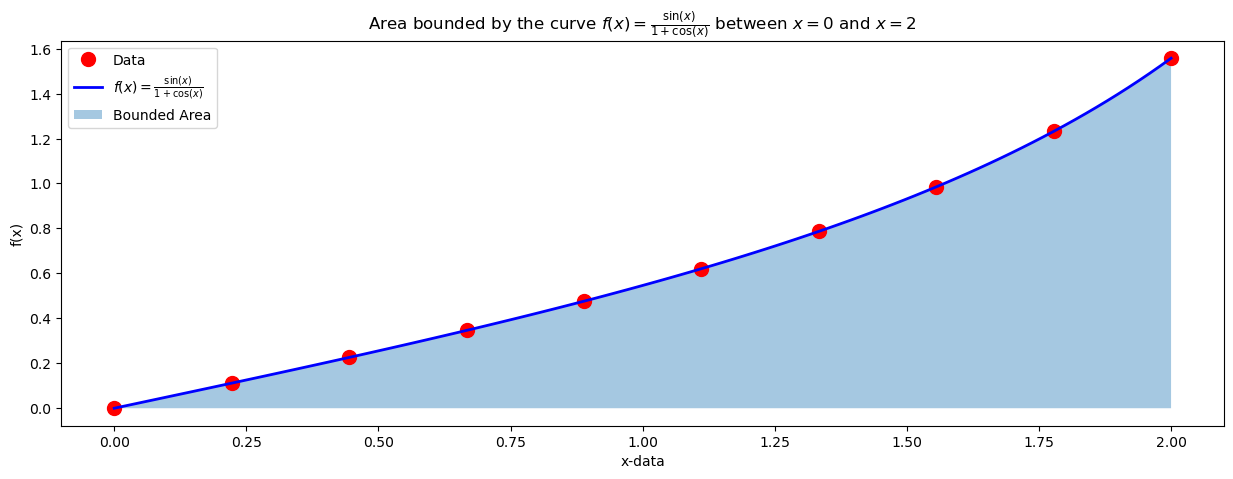

Area by Trapezoidal Rule is:  1.8785944752976969
Area by Simpon's Rule is:  1.8827451321613613


In [6]:
x = np.linspace(0,2,10)
y = np.sin(x)/(1+np.cos(x))

xs = np.linspace(0,2,100)
ys = np.sin(xs)/(1+np.cos(xs))

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(x,y,'or',ms=10,label='Data')
ax.plot(xs,ys,'-b',lw = 2, label = r'$f(x) = \frac{\sin(x)}{1+\cos(x)}$')
ax.fill_between(xs,ys,alpha=0.4,label='Bounded Area')
ax.set_xlabel('x-data')
ax.set_ylabel('f(x)')
plt.legend()
ax.set_title(r'Area bounded by the curve $f(x) = \frac{\sin(x)}{1+\cos(x)}$ between $x=0$ and $x=2$')
plt.show()

#Area by Trapezoidal rule:
area = trapezoid(x,y)
print("Area by Trapezoidal Rule is: ",area)
area = simpson(x,y)
print("Area by Simpon's Rule is: ",area)